<a href="https://colab.research.google.com/github/yxrellx/Algoritmos-con-ARREGLOS/blob/main/clustering2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd

In [40]:
df = pd.read_csv('/content/conarreglo.csv')
df

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area,quimio_terapia(2),radio_terapia(2)
0,0,75,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,"""""",0,Claudin-low,1,Positve,...,0,0,0,0,0,0,0,0.001280,SI,SI
1,2,43,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1,Positve,...,1,0,0,0,1,1,0,0.000276,SI,SI
2,5,48,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumA,1,Positve,...,1,1,0,0,1,2,1,0.000856,No,No
3,6,47,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1,Positve,...,1,2,0,1,1,2,0,0.001462,No,SI
4,8,76,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1,Positve,...,0,2,0,1,1,1,1,0.002373,No,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,7295,43,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,4,Positve,...,1,1,0,2,1,5,0,0.014624,SI,SI
1900,7296,42,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4,Positve,...,1,5,2,0,0,2,1,0.001159,SI,SI
1901,7297,62,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4,Positve,...,0,8,1,0,1,2,1,0.000658,SI,SI
1902,7298,61,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,4,Positve,...,0,8,2,0,1,4,2,0.000658,SI,No


In [41]:
df =df.drop(['patient_id','type_of_breast_surgery','cancer_type','cancer_type_detailed',"cellularity","pam50_+_claudin-low_subtype","er_status_measured_by_ihc","er_status", "her2_status_measured_by_snp6", "her2_status", "tumor_other_histologic_subtype", "inferred_menopausal_state","integrative_cluster", "primary_tumor_laterality","oncotree_code","pr_status","3-gene_classifier_subtype", "death_from_cancer","quimio_terapia(2)", "radio_terapia(2)"],axis=1)
df

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,her2_status (2),tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area
0,75,0,1,3,1,10,8,0.010013,1.405468e-07,1,...,0,0,0,0,0,0,0,0,0,0.001280
1,43,0,1,3,1,0,2,0.000065,8.466155e-01,1,...,0,0,1,0,0,0,1,1,0,0.000276
2,48,1,1,2,1,1,2,0.000065,1.637546e-07,0,...,0,0,1,1,0,0,1,2,1,0.000856
3,47,1,1,2,1,3,1,0.000065,1.649883e-01,1,...,0,1,1,2,0,1,1,2,0,0.001462
4,76,1,1,3,1,8,2,0.000099,4.138046e-01,0,...,0,1,0,2,0,1,1,1,1,0.002373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,43,0,4,3,1,1,4,0.000082,1.969323e-01,1,...,0,2,1,1,0,2,1,5,0,0.014624
1900,42,0,4,3,0,1,6,0.000082,4.474825e-01,0,...,1,0,1,5,2,0,0,2,1,0.001159
1901,62,0,4,3,1,45,4,0.000099,1.760253e-01,0,...,0,0,0,8,1,0,1,2,1,0.000658
1902,61,0,4,2,1,12,15,0.000082,8.626209e-01,0,...,0,0,0,8,2,0,1,4,2,0.000658


In [42]:
features = df.values

In [43]:
from sklearn.cluster import KMeans
common_params = {
    "n_init": "auto",
    "random_state": 2,
}
modelo = KMeans(n_clusters=10, **common_params)
y_pred = modelo.fit_predict(features)

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=0)
reduced_features = pca.fit_transform(features)
reduced_cluster_centers = pca.transform(modelo.cluster_centers_)
y_pred = modelo.predict(features)

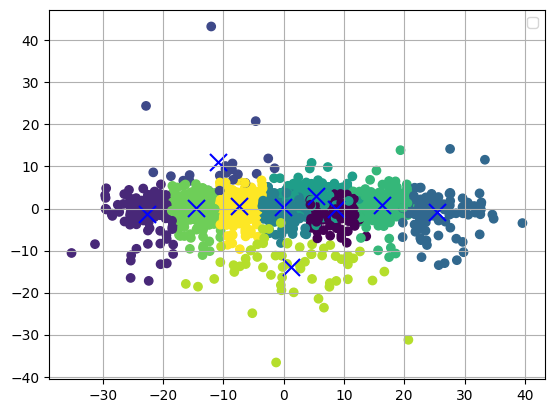

In [45]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=y_pred)
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')
ax.grid(True)
ax.legend()
plt.show()

In [46]:
type(y_pred)

numpy.ndarray

In [47]:
len(y_pred)

1904

In [48]:
df.reset_index(inplace=True, drop=False)

In [49]:
ndf = df.copy()
ndf = pd.concat([ndf, pd.DataFrame(y_pred)], axis=1)
ndf

,index,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,...,tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area,0
0,0,75,0,1,3,1,10,8,0.010013,1.405468e-07,...,0,0,0,0,0,0,0,0,0.001280,7
1,1,43,0,1,3,1,0,2,0.000065,8.466155e-01,...,0,1,0,0,0,1,1,0,0.000276,6
2,2,48,1,1,2,1,1,2,0.000065,1.637546e-07,...,0,1,1,0,0,1,2,1,0.000856,0
3,3,47,1,1,2,1,3,1,0.000065,1.649883e-01,...,1,1,2,0,1,1,2,0,0.001462,6
4,4,76,1,1,3,1,8,2,0.000099,4.138046e-01,...,1,0,2,0,1,1,1,1,0.002373,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,1899,43,0,4,3,1,1,4,0.000082,1.969323e-01,...,2,1,1,0,2,1,5,0,0.014624,6
1900,1900,42,0,4,3,0,1,6,0.000082,4.474825e-01,...,0,1,5,2,0,0,2,1,0.001159,6
1901,1901,62,0,4,3,1,45,4,0.000099,1.760253e-01,...,0,0,8,1,0,1,2,1,0.000658,8
1902,1902,61,0,4,2,1,12,15,0.000082,8.626209e-01,...,0,0,8,2,0,1,4,2,0.000658,8


In [50]:
ndf.rename(columns={0:"Cluster"},inplace=True)
ndf

,index,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,...,tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area,Cluster
0,0,75,0,1,3,1,10,8,0.010013,1.405468e-07,...,0,0,0,0,0,0,0,0,0.001280,7
1,1,43,0,1,3,1,0,2,0.000065,8.466155e-01,...,0,1,0,0,0,1,1,0,0.000276,6
2,2,48,1,1,2,1,1,2,0.000065,1.637546e-07,...,0,1,1,0,0,1,2,1,0.000856,0
3,3,47,1,1,2,1,3,1,0.000065,1.649883e-01,...,1,1,2,0,1,1,2,0,0.001462,6
4,4,76,1,1,3,1,8,2,0.000099,4.138046e-01,...,1,0,2,0,1,1,1,1,0.002373,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,1899,43,0,4,3,1,1,4,0.000082,1.969323e-01,...,2,1,1,0,2,1,5,0,0.014624,6
1900,1900,42,0,4,3,0,1,6,0.000082,4.474825e-01,...,0,1,5,2,0,0,2,1,0.001159,6
1901,1901,62,0,4,3,1,45,4,0.000099,1.760253e-01,...,0,0,8,1,0,1,2,1,0.000658,8
1902,1902,61,0,4,2,1,12,15,0.000082,8.626209e-01,...,0,0,8,2,0,1,4,2,0.000658,8


In [51]:
ndf[ndf["Cluster"]==0]

,index,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,...,tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area,Cluster
2,2,48,1,1,2,1,1,2,0.000065,1.637546e-07,...,0,1,1,0,0,1,2,1,0.000856,0
6,6,56,1,1,2,1,1,4,0.000065,1.643881e-01,...,0,0,1,0,0,1,2,0,0.000552,0
14,14,51,1,1,2,1,1,8,0.000065,1.038680e-01,...,0,0,0,1,0,1,2,0,0.001462,0
23,23,51,0,1,1,1,1,4,0.005012,1.031677e-01,...,3,0,1,1,0,1,2,0,0.000674,0
24,24,50,1,1,3,0,4,4,0.000099,2.850950e-08,...,0,0,7,0,0,0,2,1,0.002373,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,1890,53,0,4,2,1,3,1,0.000065,1.090363e-08,...,0,0,10,2,0,1,5,1,0.037667,0
1893,1893,55,0,4,2,1,8,2,0.000082,2.707569e-01,...,0,0,6,2,0,0,4,1,0.039730,0
1894,1894,51,0,4,2,1,5,5,0.000083,1.267089e-01,...,0,0,0,2,0,1,5,1,0.029172,0
1896,1896,52,0,4,2,1,1,3,0.000065,7.849283e-01,...,0,0,10,2,0,1,4,1,0.008556,0


from matplotlib import pyplot as plt
_df_48['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_49['age_at_diagnosis'].plot(kind='hist', bins=20, title='age_at_diagnosis')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_50['chemotherapy'].plot(kind='hist', bins=20, title='chemotherapy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_51['cohort'].plot(kind='hist', bins=20, title='cohort')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_52.plot(kind='scatter', x='index', y='age_at_diagnosis', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_53.plot(kind='scatter', x='age_at_diagnosis', y='chemotherapy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_54.plot(kind='scatter', x='chemotherapy', y='cohort', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_55.plot(kind='scatter', x='cohort', y='neoplasm_histologic_grade', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['age_at_diagnosis']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_56.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('age_at_diagnosis')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['chemotherapy']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_57.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('chemotherapy')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['cohort']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_58.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('cohort')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['neoplasm_histologic_grade']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_59.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('neoplasm_histologic_grade')

from matplotlib import pyplot as plt
_df_60['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_61['age_at_diagnosis'].plot(kind='line', figsize=(8, 4), title='age_at_diagnosis')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_62['chemotherapy'].plot(kind='line', figsize=(8, 4), title='chemotherapy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_63['cohort'].plot(kind='line', figsize=(8, 4), title='cohort')
plt.gca().spines[['top', 'right']].set_visible(False)

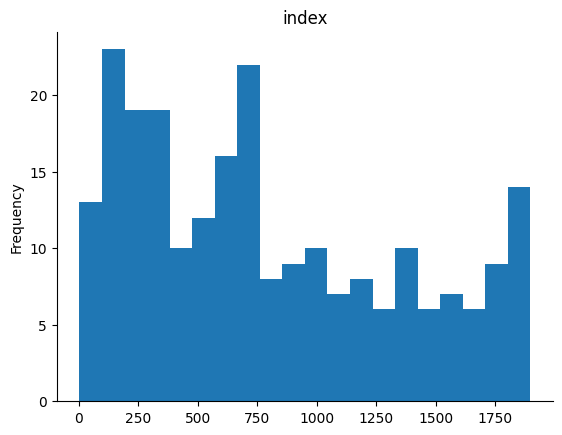

In [66]:
from matplotlib import pyplot as plt
_df_48['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

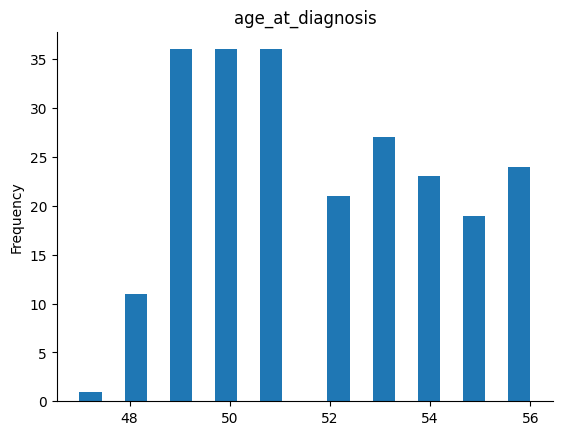

In [52]:
from matplotlib import pyplot as plt
_df_49['age_at_diagnosis'].plot(kind='hist', bins=20, title='age_at_diagnosis')
plt.gca().spines[['top', 'right',]].set_visible(False)

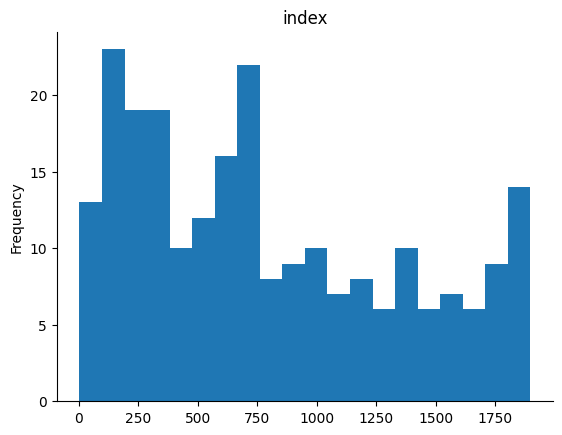

In [53]:
from matplotlib import pyplot as plt
_df_48['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

MEJORIA-Algoritmo

In [54]:
from sklearn.cluster import KMeans
common_params = {
    "n_init": "auto",
    "random_state": 8,
}
modelo = KMeans(n_clusters=10, **common_params)
y_pred = modelo.fit_predict(features)

In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=0)
reduced_features = pca.fit_transform(features)
reduced_cluster_centers = pca.transform(modelo.cluster_centers_)
y_pred = modelo.predict(features)

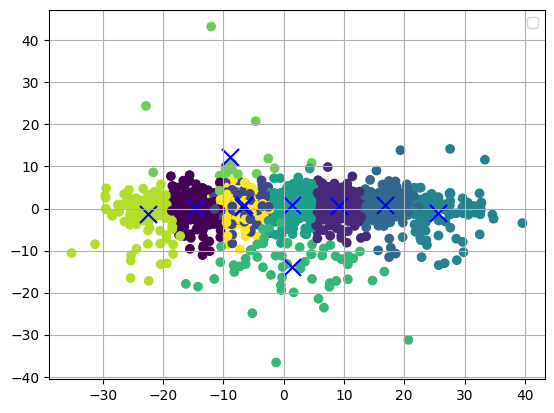

In [56]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=y_pred)
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')
ax.grid(True)
ax.legend()
plt.show()

In [57]:
type(y_pred)

numpy.ndarray

In [58]:
len(y_pred)

1904

In [59]:
df.reset_index(inplace=True, drop=False)

In [61]:
ndf = df.copy()
ndf = pd.concat([ndf, pd.DataFrame(y_pred)], axis=1)
ndf

,level_0,index,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,...,tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area,0
0,0,0,75,0,1,3,1,10,8,0.010013,...,0,0,0,0,0,0,0,0,0.001280,0
1,1,1,43,0,1,3,1,0,2,0.000065,...,0,1,0,0,0,1,1,0,0.000276,3
2,2,2,48,1,1,2,1,1,2,0.000065,...,0,1,1,0,0,1,2,1,0.000856,1
3,3,3,47,1,1,2,1,3,1,0.000065,...,1,1,2,0,1,1,2,0,0.001462,3
4,4,4,76,1,1,3,1,8,2,0.000099,...,1,0,2,0,1,1,1,1,0.002373,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,1899,1899,43,0,4,3,1,1,4,0.000082,...,2,1,1,0,2,1,5,0,0.014624,3
1900,1900,1900,42,0,4,3,0,1,6,0.000082,...,0,1,5,2,0,0,2,1,0.001159,3
1901,1901,1901,62,0,4,3,1,45,4,0.000099,...,0,0,8,1,0,1,2,1,0.000658,6
1902,1902,1902,61,0,4,2,1,12,15,0.000082,...,0,0,8,2,0,1,4,2,0.000658,6


In [62]:
ndf.rename(columns={0:"Cluster"},inplace=True)
ndf

,level_0,index,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,...,tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area,Cluster
0,0,0,75,0,1,3,1,10,8,0.010013,...,0,0,0,0,0,0,0,0,0.001280,0
1,1,1,43,0,1,3,1,0,2,0.000065,...,0,1,0,0,0,1,1,0,0.000276,3
2,2,2,48,1,1,2,1,1,2,0.000065,...,0,1,1,0,0,1,2,1,0.000856,1
3,3,3,47,1,1,2,1,3,1,0.000065,...,1,1,2,0,1,1,2,0,0.001462,3
4,4,4,76,1,1,3,1,8,2,0.000099,...,1,0,2,0,1,1,1,1,0.002373,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,1899,1899,43,0,4,3,1,1,4,0.000082,...,2,1,1,0,2,1,5,0,0.014624,3
1900,1900,1900,42,0,4,3,0,1,6,0.000082,...,0,1,5,2,0,0,2,1,0.001159,3
1901,1901,1901,62,0,4,3,1,45,4,0.000099,...,0,0,8,1,0,1,2,1,0.000658,6
1902,1902,1902,61,0,4,2,1,12,15,0.000082,...,0,0,8,2,0,1,4,2,0.000658,6


In [63]:
ndf[ndf["Cluster"]==0]

,level_0,index,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,...,tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area,Cluster
0,0,0,75,0,1,3,1,10,8,0.010013,...,0,0,0,0,0,0,0,0,0.001280,0
4,4,4,76,1,1,3,1,8,2,0.000099,...,1,0,2,0,1,1,1,1,0.002373,0
5,5,5,78,0,1,3,1,0,4,0.006730,...,0,0,3,1,0,1,1,1,0.003653,0
29,29,29,78,0,1,3,1,3,1,0.000082,...,0,0,6,0,0,1,2,0,0.001766,0
45,45,45,72,0,1,3,1,1,3,0.008375,...,0,0,2,1,0,0,4,1,0.001523,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1854,1854,1854,74,0,4,2,1,0,6,0.050448,...,0,0,6,1,0,1,5,2,0.011141,0
1858,1858,1858,77,0,4,2,1,8,10,0.008349,...,0,0,2,2,0,1,4,1,0.006226,0
1861,1861,1861,78,0,4,1,1,0,5,0.003371,...,0,0,6,2,0,0,5,2,0.007557,0
1863,1863,1863,75,0,4,8,1,0,4,0.001726,...,0,0,6,2,0,1,5,2,0.015246,0


from matplotlib import pyplot as plt
_df_64['level_0'].plot(kind='hist', bins=20, title='level_0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_65['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_66['age_at_diagnosis'].plot(kind='hist', bins=20, title='age_at_diagnosis')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_67['chemotherapy'].plot(kind='hist', bins=20, title='chemotherapy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_68.plot(kind='scatter', x='level_0', y='index', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_69.plot(kind='scatter', x='index', y='age_at_diagnosis', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_70.plot(kind='scatter', x='age_at_diagnosis', y='chemotherapy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_71.plot(kind='scatter', x='chemotherapy', y='cohort', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['level_0']
  ys = series['age_at_diagnosis']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_72.sort_values('level_0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('level_0')
_ = plt.ylabel('age_at_diagnosis')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['level_0']
  ys = series['chemotherapy']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_73.sort_values('level_0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('level_0')
_ = plt.ylabel('chemotherapy')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['level_0']
  ys = series['cohort']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_74.sort_values('level_0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('level_0')
_ = plt.ylabel('cohort')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['level_0']
  ys = series['neoplasm_histologic_grade']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_75.sort_values('level_0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('level_0')
_ = plt.ylabel('neoplasm_histologic_grade')

from matplotlib import pyplot as plt
_df_76['level_0'].plot(kind='line', figsize=(8, 4), title='level_0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_77['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_78['age_at_diagnosis'].plot(kind='line', figsize=(8, 4), title='age_at_diagnosis')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_79['chemotherapy'].plot(kind='line', figsize=(8, 4), title='chemotherapy')
plt.gca().spines[['top', 'right']].set_visible(False)

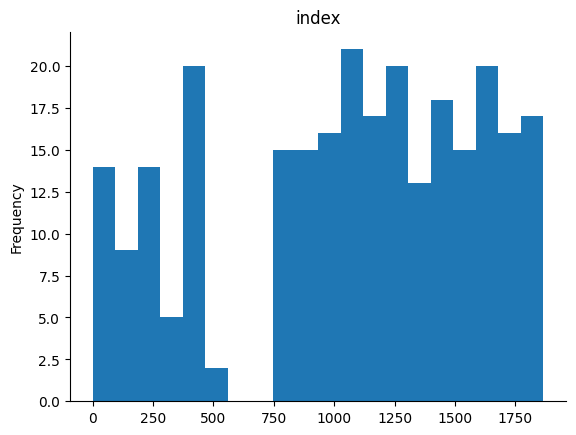

In [67]:
from matplotlib import pyplot as plt
_df_65['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

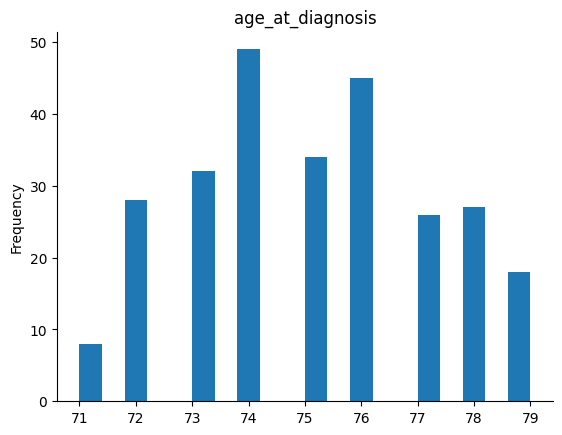

In [64]:
from matplotlib import pyplot as plt
_df_66['age_at_diagnosis'].plot(kind='hist', bins=20, title='age_at_diagnosis')
plt.gca().spines[['top', 'right',]].set_visible(False)

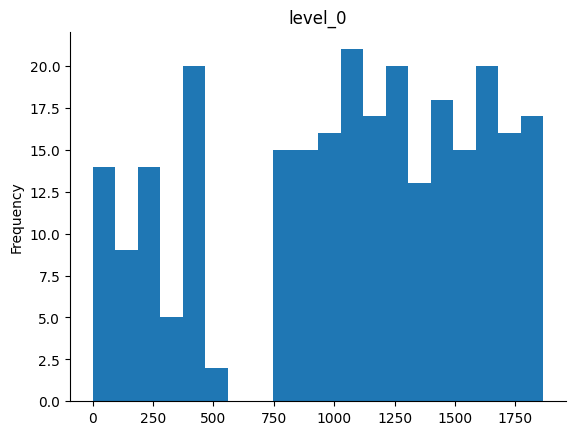

In [65]:
from matplotlib import pyplot as plt
_df_64['level_0'].plot(kind='hist', bins=20, title='level_0')
plt.gca().spines[['top', 'right',]].set_visible(False)